In [215]:
import pandas as pd
performance_data=pd.read_csv(r"D:\Laya\project-laya\Part-ML-project\test_performance_data.csv")
performance_data.head(6)

,test_case_id,module_name,response_time,processing_speed,num_of_users,cpu_usage,ram_usage,errors_encountered,time_to_failure
0,1,Task Management,150,200,100,70,65,2,30
1,2,User Management,200,180,150,80,75,3,15
2,3,Reporting,250,160,200,85,80,4,10
3,4,Task Management,180,190,120,75,70,1,25
4,5,User Management,220,170,160,82,78,3,12
5,6,Reporting,300,150,180,90,85,5,8


In [216]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   test_case_id        6 non-null      int64 
 1   module_name         6 non-null      object
 2   response_time       6 non-null      int64 
 3   processing_speed    6 non-null      int64 
 4   num_of_users        6 non-null      int64 
 5   cpu_usage           6 non-null      int64 
 6   ram_usage           6 non-null      int64 
 7   errors_encountered  6 non-null      int64 
 8   time_to_failure     6 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 564.0+ bytes


In [219]:
#Is null data..?
performance_data.isna()

,test_case_id,module_name,response_time,processing_speed,num_of_users,cpu_usage,ram_usage,errors_encountered,time_to_failure
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False


In [217]:
performance_data.describe()

,test_case_id,response_time,processing_speed,num_of_users,cpu_usage,ram_usage,errors_encountered,time_to_failure
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,3.500000,216.666667,175.000000,151.666667,80.333333,75.50000,3.000000,16.666667
std,1.870829,53.166405,18.708287,37.103459,7.118052,7.17635,1.414214,8.846845
min,1.000000,150.000000,150.000000,100.000000,70.000000,65.00000,1.000000,8.000000
25%,2.250000,185.000000,162.500000,127.500000,76.250000,71.25000,2.250000,10.500000
50%,3.500000,210.000000,175.000000,155.000000,81.000000,76.50000,3.000000,13.500000
75%,4.750000,242.500000,187.500000,175.000000,84.250000,79.50000,3.750000,22.500000
max,6.000000,300.000000,200.000000,200.000000,90.000000,85.00000,5.000000,30.000000


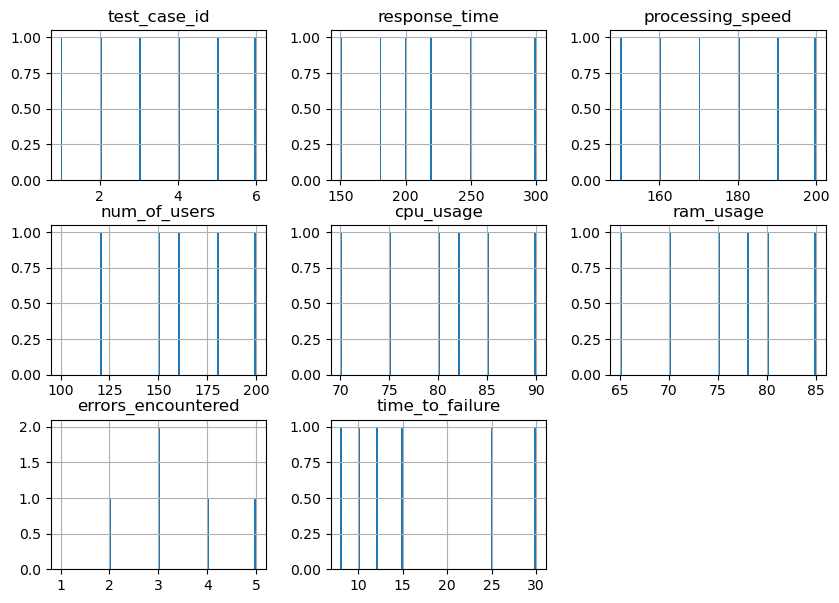

In [218]:
import matplotlib.pyplot as plt
performance_data.hist(bins=100,figsize=(10,7))
plt.show()

In [220]:
#normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
performance_data[['response_time','processing_speed','num_of_users','cpu_usage','ram_usage','errors_encountered']] = scaler.fit_transform(performance_data[['response_time','processing_speed','num_of_users','cpu_usage','ram_usage','errors_encountered']])

In [221]:
performance_data.head(6)

,test_case_id,module_name,response_time,processing_speed,num_of_users,cpu_usage,ram_usage,errors_encountered,time_to_failure
0,1,Task Management,0.000000,1.0,0.0,0.00,0.00,0.25,30
1,2,User Management,0.333333,0.6,0.5,0.50,0.50,0.50,15
2,3,Reporting,0.666667,0.2,1.0,0.75,0.75,0.75,10
3,4,Task Management,0.200000,0.8,0.2,0.25,0.25,0.00,25
4,5,User Management,0.466667,0.4,0.6,0.60,0.65,0.50,12
5,6,Reporting,1.000000,0.0,0.8,1.00,1.00,1.00,8


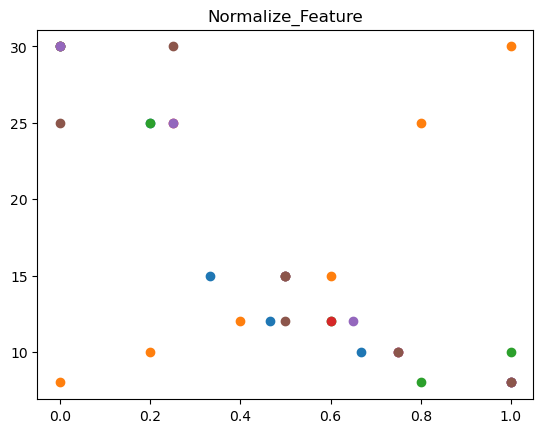

In [222]:
data_features=['response_time','processing_speed','num_of_users','cpu_usage','ram_usage','errors_encountered']
X=performance_data[data_features]
y=performance_data.time_to_failure
plt.plot(X,y,'o')
plt.title("Normalize_Feature")
plt.show()

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [224]:
#Linear Regression model:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Fit train data
model.fit(X_train, y_train)

LinearRegression()

In [230]:
#Predict by LinearRegresion Model
y_pred = model.predict(X_test)
(y_test,y_pred)

(0    30
 1    15
 Name: time_to_failure, dtype: int64,
 array([26.28630464, 14.22003751]))

In [226]:
#MSE For LinearRegresion
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

(mse,r2)

(7.199937361989229, 0.8720011135646359)

In [227]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model_reg = DecisionTreeRegressor()
#Fit train data
model_reg.fit(X_train, y_train)
#predict
y_pred_reg = model_reg.predict(X_test)
(y_test,y_pred_reg)

(0    30
 1    15
 Name: time_to_failure, dtype: int64,
 array([25., 12.]))

In [228]:
#MSE For DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
mse_reg = mean_squared_error(y_test, y_pred_reg)

r2_reg = r2_score(y_test, y_pred_reg)

(mse,r2)

(7.199937361989229, 0.8720011135646359)

In [231]:
X_test

,response_time,processing_speed,num_of_users,cpu_usage,ram_usage,errors_encountered
0,0.000000,1.0,0.0,0.0,0.0,0.25
1,0.333333,0.6,0.5,0.5,0.5,0.50


In [232]:
y_test

0    30
1    15
Name: time_to_failure, dtype: int64

In [233]:
y_pred

array([26.28630464, 14.22003751])

In [234]:
y_pred_reg

array([25., 12.])